<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5

Importar bibliotecas a utilizar

In [ ]:
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Celda para configurar Dataframe df_meteo

In [ ]:
# Tomar la dirección URL del archivo en formato 'raw'
url = "https://raw.githubusercontent.com/JuanPedroDelCastillo/FisicaComputacional1/master/Actividad5/26139.txt"
url2 = "https://raw.githubusercontent.com/JuanPedroDelCastillo/FisicaComputacional1/master/Actividad5/26032.txt"

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
df2_dist = pd.read_csv(url2, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')


# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()
df2_work0 = df2_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)
df2_work1 = df2_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')
  df2_work1[cols] = pd.to_numeric(df2_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()
df2_work2 = df2_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()
df2_work2['Fecha']=pd.to_datetime(df2_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

df2_work2['Año'] = df2_work2['Fecha'].dt.year
df2_work2['Mes'] = df2_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

df2_meteo = df2_work2.copy()
df2_meteo.info()
print(df2_meteo.head())
print(df2_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19301 entries, 0 to 19300
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   19301 non-null  datetime64[ns]
 1   Precip  19291 non-null  float64       
 2   Evap    10285 non-null  float64       
 3   Tmax    19121 non-null  float64       
 4   Tmin    19138 non-null  float64       
 5   Año     19301 non-null  int64         
 6   Mes     19301 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1961-01-01     0.0   1.6  23.0   7.0  1961  Jan
1 1961-01-02     0.0   2.1  25.0   5.0  1961  Jan
2 1961-01-03     0.0   4.5  26.0   7.0  1961  Jan
3 1961-01-04     0.0   2.5  26.5   8.0  1961  Jan
4 1961-01-05    20.0   4.6  27.0   7.5  1961  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
19296 2018-02-25     0.0   NaN   NaN   NaN  2018  Feb
19297 2

## Serie de Tiempo

In [ ]:
# Primero realizamos una copia del Dataframe
df_meteo_ts = df_meteo.copy()
df2_meteo_ts = df2_meteo.copy()

# Redefinimos que el índice de este Dataframe sea la fecha 
df_meteo_ts = df_meteo_ts.set_index("Fecha")
df2_meteo_ts = df2_meteo_ts.set_index("Fecha")

# Definimos conjuntos de años de 30 años
df_60 = df_meteo_ts[(df_meteo_ts["Año"]>=1960)&(df_meteo_ts["Año"]<1990)]
df_90 = df_meteo_ts[(df_meteo_ts["Año"]>=1990)&(df_meteo_ts["Año"]<2018)]
df2_90 = df2_meteo_ts[(df2_meteo_ts["Año"]>=1996)&(df2_meteo_ts["Año"]<2015)]

### Precipitación

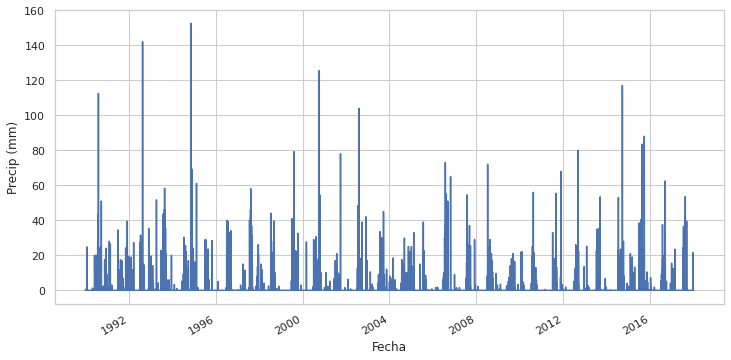

In [ ]:
# Graficar todo el rango de datos de Precipitación
ax = df_90['Precip'].plot()

ax.set_ylabel('Precip (mm)');

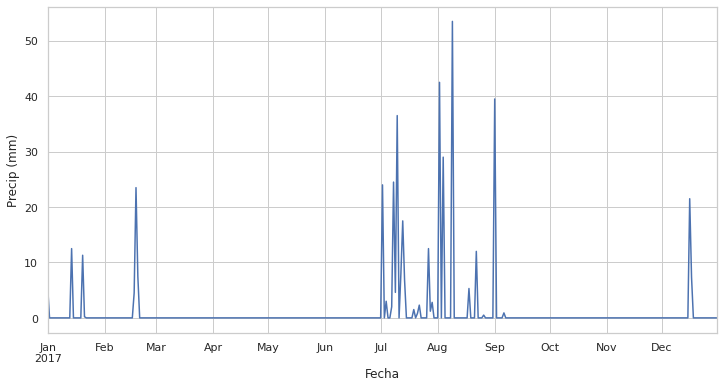

In [ ]:
# Graficar un periodo de Tiempo de la Precipitación
ax = df_90.loc['2017', 'Precip'].plot()

ax.set_ylabel('Precip (mm)');

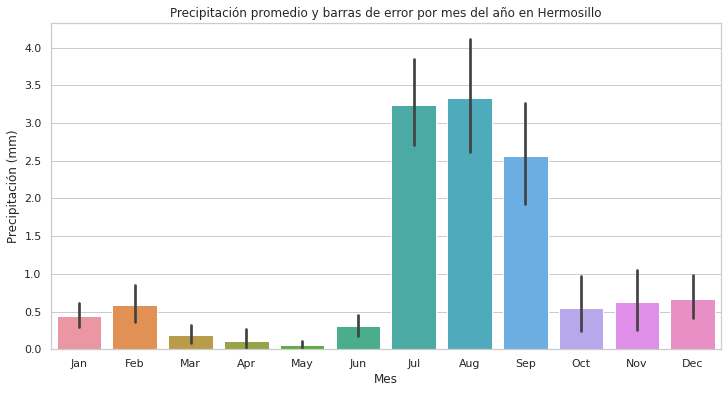

In [ ]:
# Graficamos la estacionalidad de los datos por mes con barras
sns.set_style('whitegrid')

sns.barplot(data=df_90, x='Mes', y='Precip')

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error por mes del año en Hermosillo')
plt.show()

### Temperatura Máxima y Mínima de los últimos 30 años

Text(0.5, 0, 'Año')

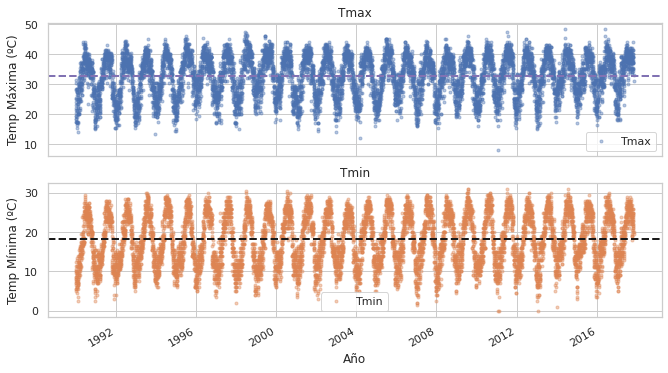

In [ ]:
# Graficamos la Tmax y Tmin de los últimos 30 años (1990-hasta 2018)

# Cálculo de promedios
Tmax_ave_90 = df_90.Tmax.mean()
Tmin_ave_90 = df_90.Tmin.mean()

colsplot=['Tmax','Tmin']
axes = df_90[colsplot].plot(marker='.',alpha=0.4, linestyle='None', figsize=(11,6), subplots=True)

for name, ax in zip(colsplot, axes):

# Gráfica de los promedios

  if name == "Tmax":
    ax.axhline(Tmax_ave_90, color = 'm', linestyle='--', linewidth=2);
    ax.set_ylabel('Temp Máxima (ºC)');

  else: 
    ax.axhline(Tmin_ave_90, color = 'k', linestyle='--', linewidth=2);
    ax.set_ylabel('Temp Mínima (ºC)');

  ax.set_title(name)

plt.xlabel('Año')

Text(0.5, 0, 'Mes')

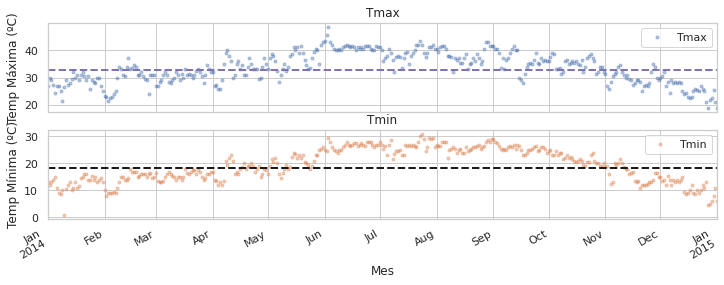

In [ ]:
# Investigando un año 2014 de datos de Tmax y Tmin, usando la función df.loc() para filtrar un periodo.

# Cálculo de promedios
Tmax_ave_90 = df_90.Tmax.mean()
Tmin_ave_90 = df_90.Tmin.mean()

colsplot=['Tmax','Tmin']

axes=df_90[colsplot].loc['2014-01-01':'2015-01-01'].plot(marker='.',alpha=0.4, linestyle='None', figsize=(12,4), subplots=True)

for name, ax in zip(['Tmax', 'Tmin'],axes):

# Gráfica de los promedios

  if name == 'Tmax':
    ax.axhline(Tmax_ave_90, color = 'm', linestyle='--', linewidth=2);
    ax.set_ylabel('Temp Máxima (ºC)');
 
  else:
    ax.axhline(Tmin_ave_90, color = 'k', linestyle='--', linewidth=2);
    ax.set_ylabel('Temp Mínima (ºC)');
  
  ax.set_title(name)

plt.xlabel('Mes')

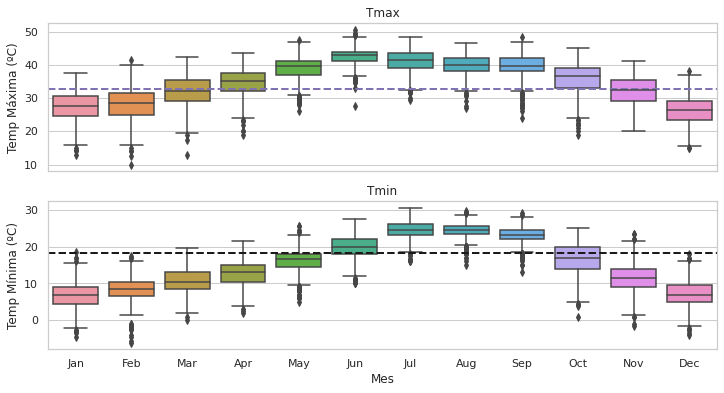

In [ ]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

for name, ax in zip(['Tmax', 'Tmin'], axes):
  sns.boxplot(data=df2_90, x='Mes', y=name, ax=ax)

  if name == 'Tmax':
    ax.axhline(Tmax_ave_90, color = 'm', linestyle='--', linewidth=2);
    ax.set_ylabel('Temp Máxima (ºC)');
 
  else:
    ax.axhline(Tmin_ave_90, color = 'k', linestyle='--', linewidth=2);
    ax.set_ylabel('Temp Mínima (ºC)');  

  ax.set_title(name)

  if ax != axes[-1]:
    ax.set_xlabel('')


### Evaporación de los últimos 30 años

Text(0.5, 0, 'Año')

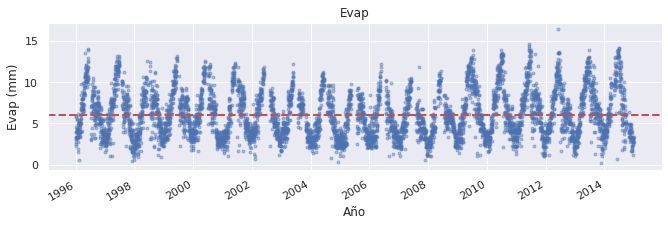

In [ ]:
# Graficamos Evap de los últimos 30 años (1995 hasta 2015)

# Cálculo de promedios
Evap_ave_90 = df2_90.Evap.mean()

df2_90['Evap'].plot(marker='.',alpha=0.4, linestyle='None', figsize=(11,3))

# Gráfica del Promedio
plt.axhline(Evap_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.ylabel('Evap (mm)');

plt.title('Evap')
plt.xlabel('Año')

Text(0.5, 0, 'Mes')

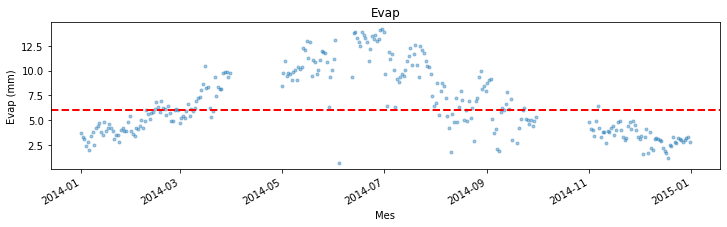

In [ ]:
# Investigando un año 2014 de datos de Evaporación, usando la función df.loc() para filtrar un periodo.

# Cálculo de promedios
Evap_ave_90 = df2_90.Evap.mean()

df2_90['Evap'].loc['2014-01-01':'2015-01-01'].plot(marker='.',alpha=0.4, linestyle='None', figsize=(12,3))

plt.axhline(Evap_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.ylabel('Evap (mm)');
 
plt.title('Evap')
plt.xlabel('Mes')

Text(0.5, 1.0, 'Evap')

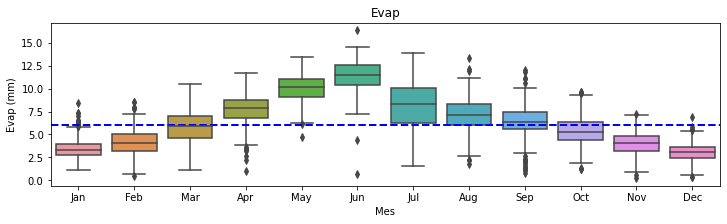

In [ ]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.

plt.figure(figsize=(12, 3))
sns.boxplot(data=df2_90, x='Mes', y='Evap')

plt.axhline(Evap_ave_90, color = 'b', linestyle='--', linewidth=2);
plt.ylabel('Evap (mm)');

plt.title('Evap')



## Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días

In [ ]:
# Suavizando la curva de Tmax, Tmin y Evap utilizando Promedios Móviles (7,30 y 365 días)

data_cols = ['Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True, min_periods=1).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True, min_periods=1).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True, min_periods=1).mean()

df2_90_7d = df2_90['Evap'].rolling(7, center=True, min_periods=1).mean()
df2_90_30d = df2_90['Evap'].rolling(30, center=True, min_periods=1).mean()
df2_90_365d = df2_90['Evap'].rolling(365, center=True, min_periods=1).mean()


### Temperatura Máxima

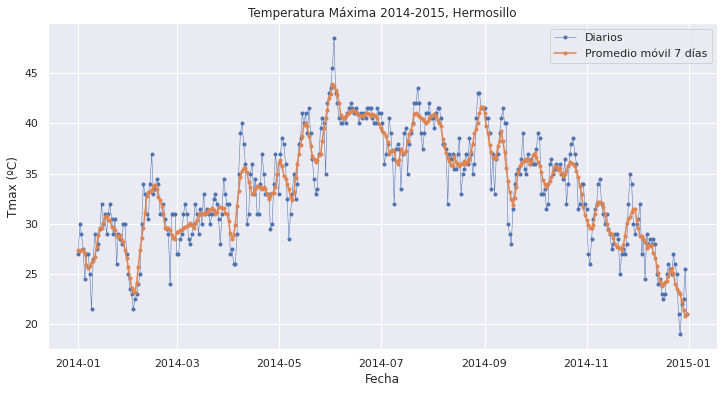

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2014-01', '2014-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'], marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2014-2015, Hermosillo')
ax.legend();

Text(0.5, 1.0, 'Temperatura Máxima 1990-2015, Hermosillo')

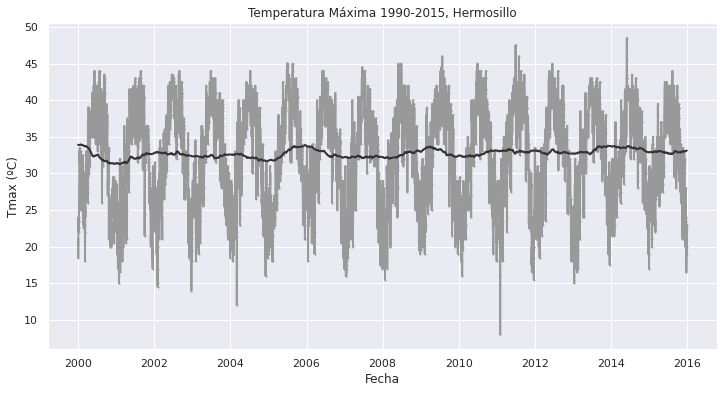

In [ ]:
# Tendencias de los años 

# Fechas de inicio y fin, para filtrar la información
start, end = '2000-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'], marker='.', linewidth=2, markersize=2, linestyle='-',color='0.6', label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1990-2015, Hermosillo')

### Temperatura Mínima

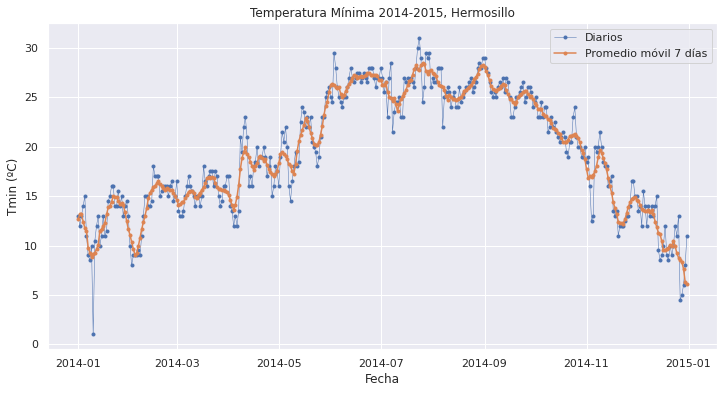

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2014-01', '2014-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'], marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2014-2015, Hermosillo')
ax.legend();

Text(0.5, 1.0, 'Temperatura Mínima 1990-2015, Hermosillo')

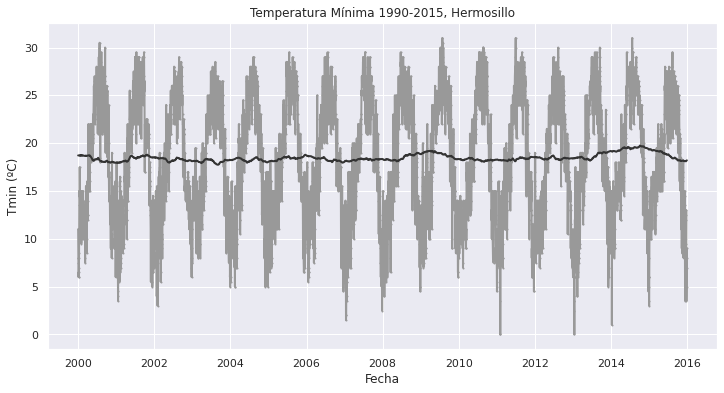

In [ ]:
# Tendencias de los años 

# Fechas de inicio y fin, para filtrar la información
start, end = '2000-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'], marker='.', linewidth=2, markersize=2, linestyle='-',color='0.6', label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 1990-2015, Hermosillo')

### Evaporación

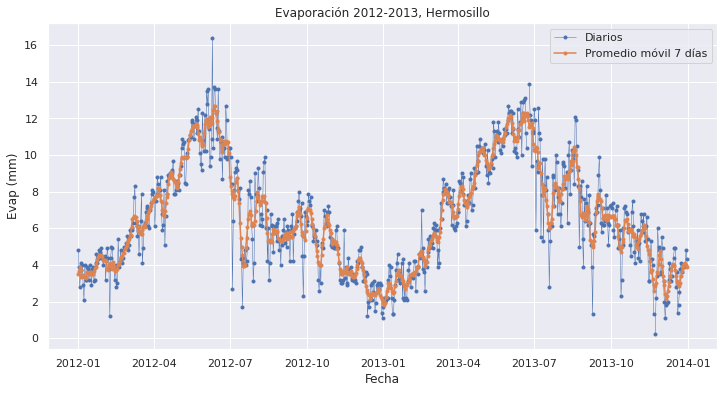

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2012-01', '2013-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df2_90.loc[start:end, 'Evap'], marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df2_90_7d.loc[start:end], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap (mm)')
ax.set_title('Evaporación 2012-2013, Hermosillo')
ax.legend();

Text(0.5, 1.0, 'Evaporación 2000-2015, Hermosillo')

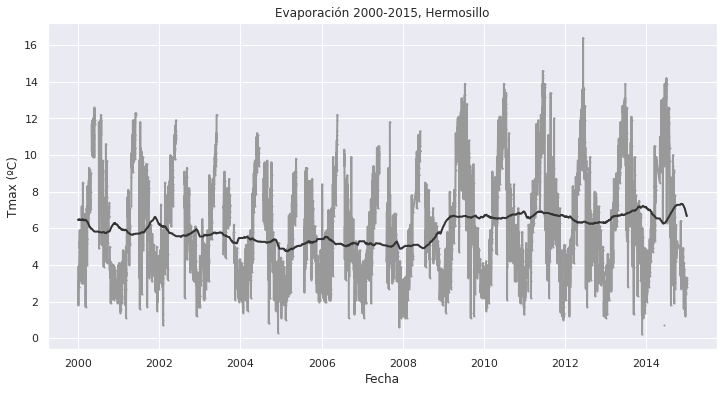

In [ ]:
# Tendencias de los años 

# Fechas de inicio y fin, para filtrar la información
start, end = '2000-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df2_90.loc[start:end, 'Evap'], marker='.', linewidth=2, markersize=2, linestyle='-',color='0.6', label='Datos Diarios')
ax.plot(df2_90_365d.loc[start:end], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Evaporación 2000-2015, Hermosillo')

## Análisis de Tendencia

### Temperatura Máxima

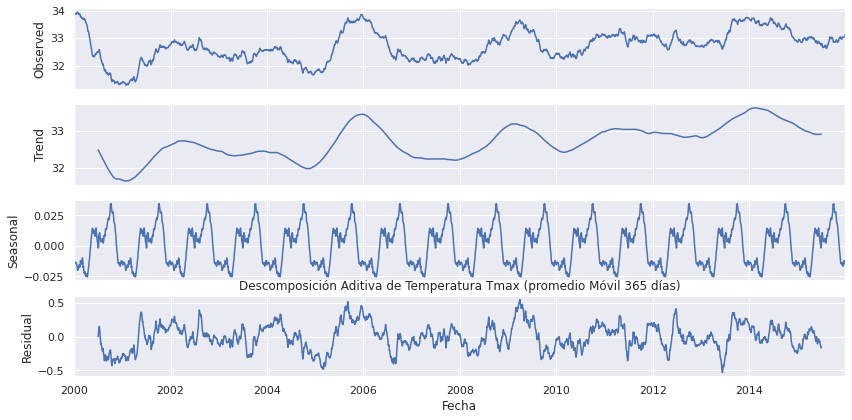

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

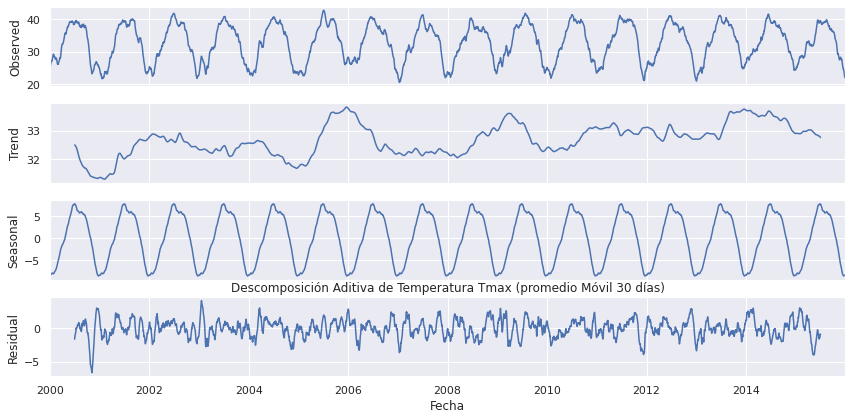

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

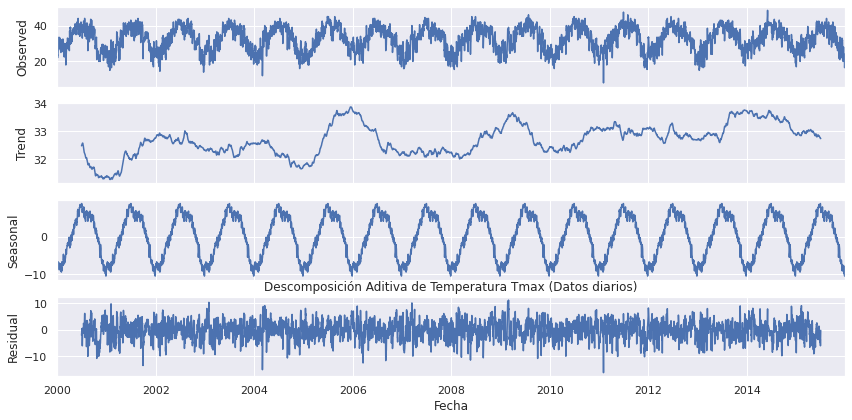

In [ ]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

### Temperatura Mínima

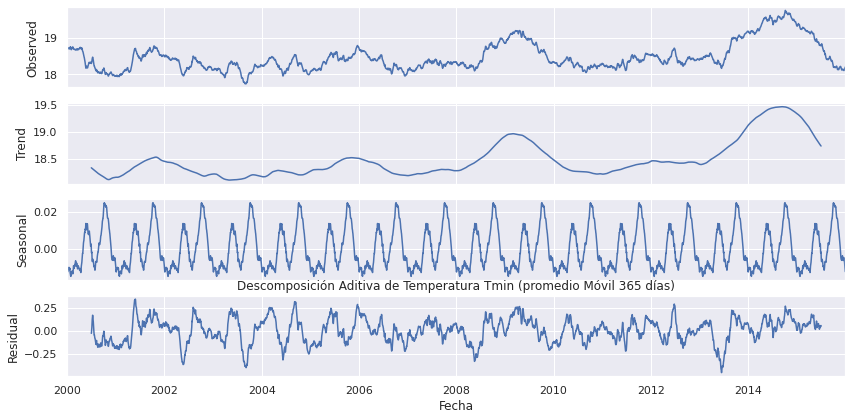

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

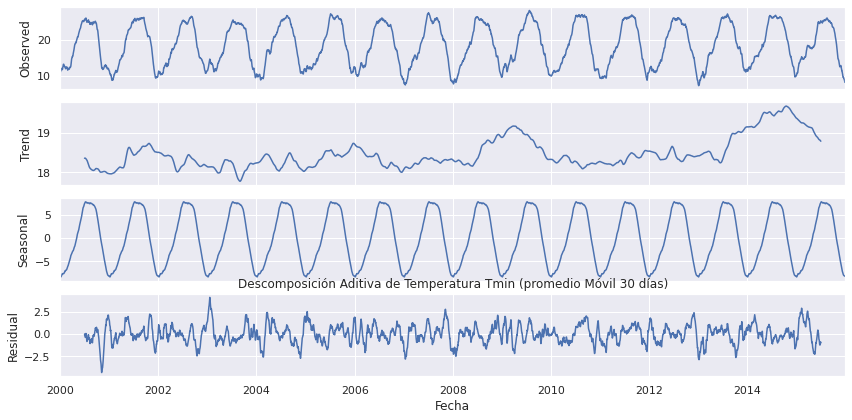

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

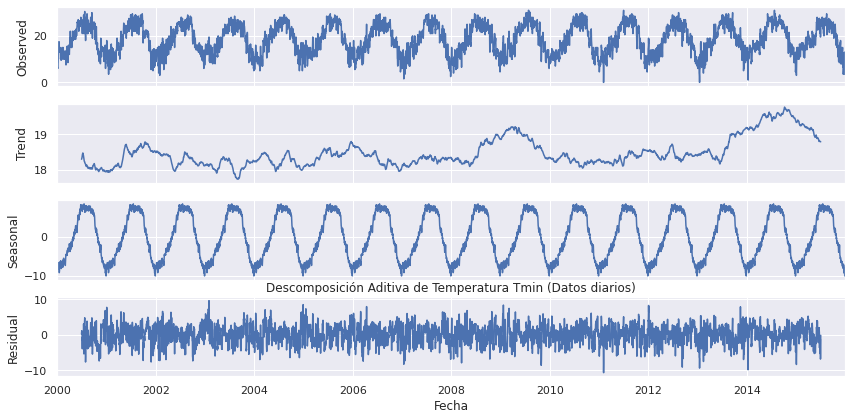

In [ ]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

### Evaporación

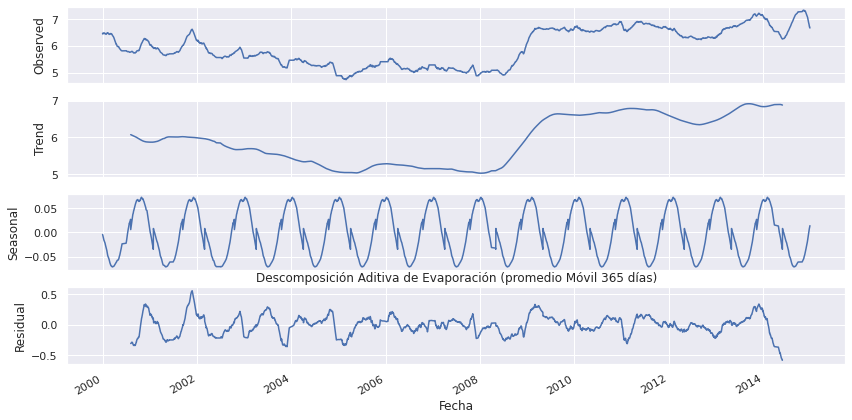

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resEvap = sm.tsa.seasonal_decompose(df2_90_365d.loc[start:end].interpolate(),
                                    freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 365 días)');

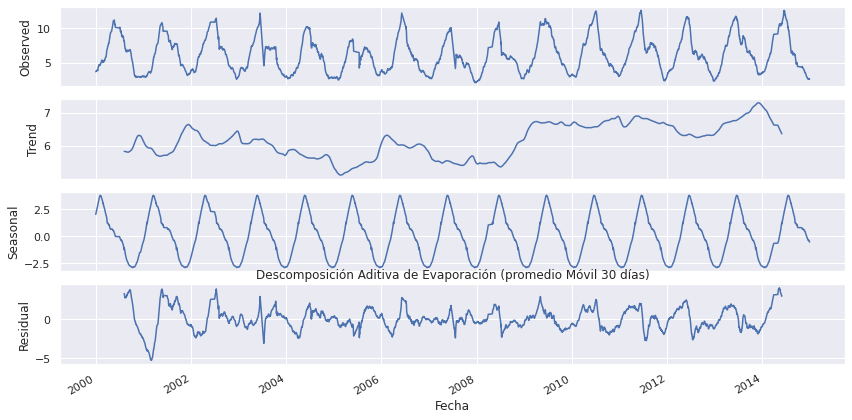

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resEvap = sm.tsa.seasonal_decompose(df2_90_30d.loc[start:end].interpolate(),
                                    freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 30 días)');

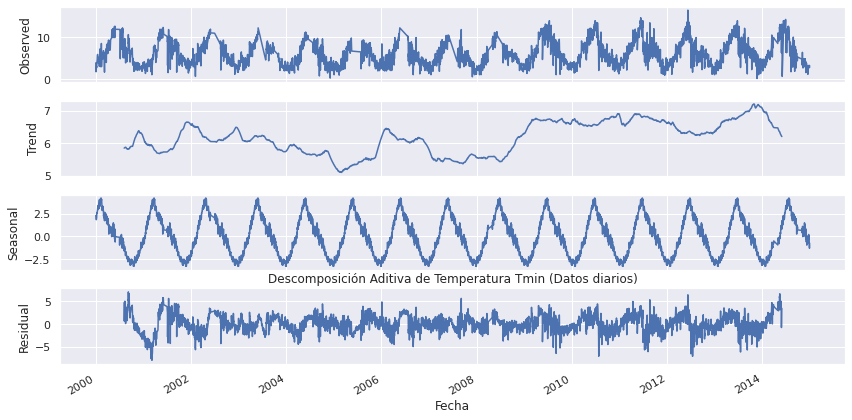

In [ ]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2015-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resEvap = sm.tsa.seasonal_decompose(df2_90.loc[start:end, 'Evap'].interpolate(),freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

## Distribución de Temperaturas

Temperatura Máxima

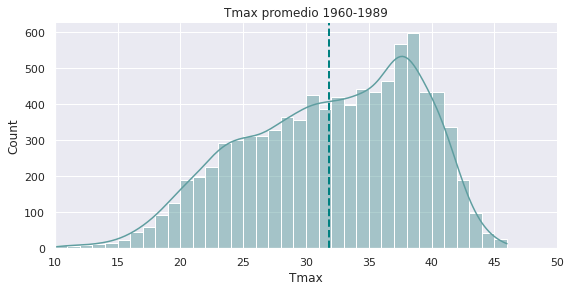

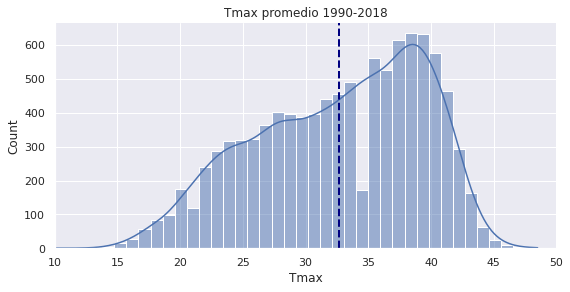

Tmax_promedio df_60 =  31.870049008687904 ºC
Tmax_promedio df_90 =  32.6778369318742 ºC


In [ ]:
# Gráfica de distribuciones de Temperaturas Tmax 
g1 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g2 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmax promedio 1960-1989');
g2.set(title='Tmax promedio 1990-2018');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))

plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )


Temperatura Mínima

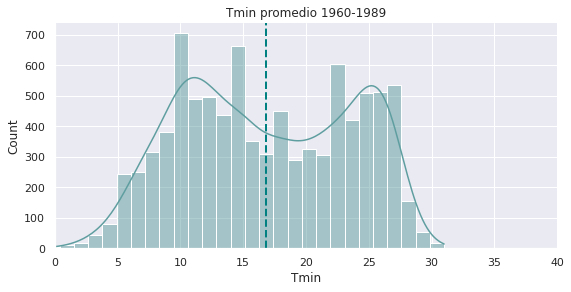

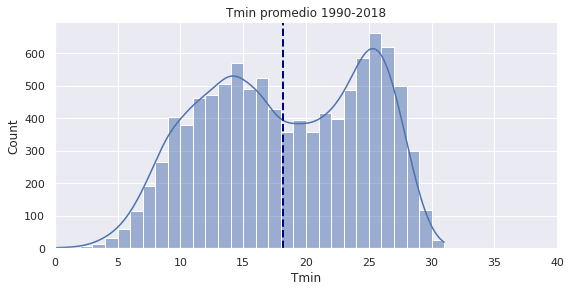

Tmax_promedio df_60 =  16.83258839226151 ºC
Tmax_promedio df_90 =  18.194026025236592 ºC


In [ ]:
# Gráfica de distribuciones de Temperaturas Tmax 
g1 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g2 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmin promedio 1960-1989');
g2.set(title='Tmin promedio 1990-2018');
g1.set(xlim=(0,40))
g2.set(xlim=(0,40))

plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )
